In [1]:
using Condor
using NPZ
using Healpix
using Plots
using PyCall
using Falcons
using PyPlot

hp = pyimport("healpy")
np = pyimport("numpy")
plt = pyimport("matplotlib.pyplot")

┌ Info: Precompiling Condor [ce3e846d-a250-429b-81e6-e6cf6b410658]
└ @ Base loading.jl:1423
┌ Warning: Package Condor does not have Falcons in its dependencies:
│ - If you have Condor checked out for development and have
│   added Falcons as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with Condor
└ Loading Falcons into Condor from project dependency, future warnings for Condor are suppressed.
┌ Warning: You are using Matplotlib 3.3.4, which is no longer
│ officialy supported by the Plots community. To ensure smooth Plots.jl
│ integration update your Matplotlib library to a version >= 3.4.0
│ 
│ If you have used Conda.jl to install PyPlot (default installation),
│ upgrade your matplotlib via Conda.jl and rebuild the PyPlot.
│ 
│ If you are not sure, here are the default instructions:
│ 
│ In Julia REPL:
│ ```
│ import Pkg;
│ Pkg.add("Conda")
│ import Conda
│ Conda.update()
│ Pkg.build("

PyObject <module 'matplotlib.pyplot' from '/home/cmb/naganoy/.julia/conda/3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

In [3]:
idx=1
nside = 128
save_dir = "./"
dir=save_dir*"test=$idx.hdf5"

"./test=1.hdf5"

In [28]:
alm_path="/gpfs/group/cmb/litebird/usr/wangw/d0s0/alm_LB_HFT_195_PTEP_20200915_compsep.fits"
blm_path="/gpfs/group/cmb/litebird/usr/wangw/output_wang/beam/blm/fc/H1-195/blm_H00_120_Q_195B_I000.fits"
alm_LB_HFT_195_PTEP_20200915_compsep=ComplexF64.(hp.read_alm(alm_path, hdu = [1,2,3]))
blm_H00_120_Q_195B_I000=ComplexF64.(hp.read_alm(blm_path, hdu = [1,2,3]))

3×134655 Matrix{ComplexF64}:
 0.101997+0.0im  0.176581+0.0im  0.227776+0.0im  …  1.34001e-9+8.83946e-10im
      0.0+0.0im       0.0+0.0im       0.0+0.0im            0.0+0.0im
      0.0+0.0im       0.0+0.0im       0.0+0.0im            0.0+0.0im

In [7]:
function truncate_alm(alm, lmax, mmax)
    alm_new = Alm(lmax,mmax)
    size = numberOfAlms(lmax, min(mmax,alm.mmax))
    for idx in 1:size
        m = convert(Int64, ceil(((2 * lmax + 1) - sqrt((2 * lmax + 1) ^ 2 - 8 * (idx - 1 - lmax))) / 2))
        l = idx - 1 - m * div(2 * lmax + 1 - m,2)
        alm_new.alm[idx] = alm.alm[almIndex(alm, l, m)]
    end
    return alm_new
end

py"""def truncate_alm(alms, lmax = -1, mmax = -1, mmax_in=-1):
    import healpy as hp
    import numpy as np
    l2max = hp.Alm.getlmax(alms.shape[-1], mmax=mmax_in)
    if lmax != -1 and lmax > l2max:
        raise ValueError("Too big lmax in parameter")
    elif lmax == -1:
        lmax = l2max

    if mmax_in == -1:
        mmax_in = l2max

    if mmax == -1:
        mmax = lmax
    if mmax > mmax_in:
        mmax = mmax_in

    # if out_dtype is None:
    #     out_dtype = alms[0].real.dtype

    l, m = hp.Alm.getlm(lmax)
    idx = np.where((l <= lmax) * (m <= mmax))
    l = l[idx]
    m = m[idx]

    idx_in_original = hp.Alm.getidx(l2max, l=l, m=m)
    
    return alms[..., idx_in_original]
"""

py"""def pad_alm(alms, mmax_in = -1):
    import healpy as hp
    import numpy as np
    lmax = hp.Alm.getlmax(alms.shape[-1], mmax=mmax_in)
    lm_size = hp.Alm.getsize(lmax)
    alms_new = np.zeros((alms.shape[:-1])+(lm_size,), dtype=alms.dtype)
    alms_new[..., :alms.shape[-1]] = alms
    return alms_new 
"""

In [31]:
lmax = 3*nside-1
mmax = 3*nside-1
pad_alm=py"pad_alm"(alm_LB_HFT_195_PTEP_20200915_compsep, mmax_in=3*512)
alm=py"truncate_alm"(pad_alm, lmax = 128*3-1, mmax = 128*3-1)
pad_blm=py"pad_alm"(blm_H00_120_Q_195B_I000, mmax_in=140)
blm=py"truncate_alm"(pad_blm, lmax = lmax, mmax = mmax)
np.save("alm_test", alm)
np.save("blm_test",blm)

In [4]:
npix = nside2npix(nside)
res = Resolution(nside)

Healpix resolution(NSIDE = 128)

In [10]:
unique_θ = unique_theta(npix, res);

In [11]:
FFTConv_demo_onlyT(alm, blm, unique_θ, lmax, nside, idx, dir)

l = 383
l = 382
l = 381
l = 380
l = 379
l = 378
l = 377
l = 376
l = 375
l = 374
l = 373
l = 372
l = 371
l = 370
l = 369
l = 368
l = 367
l = 366
l = 365
l = 364
l = 363
l = 362
l = 361
l = 360
l = 359
l = 358
l = 357
l = 356
l = 355
l = 354
l = 353
l = 352
l = 351
l = 350
l = 349
l = 348
l = 347
l = 346
l = 345
l = 344
l = 343
l = 342
l = 341
l = 340
l = 339
l = 338
l = 337
l = 336
l = 335
l = 334
l = 333
l = 332
l = 331
l = 330
l = 329
l = 328
l = 327
l = 326
l = 325
l = 324
l = 323
l = 322
l = 321
l = 320
l = 319
l = 318
l = 317
l = 316
l = 315
l = 314
l = 313
l = 312
l = 311
l = 310
l = 309
l = 308
l = 307
l = 306
l = 305
l = 304
l = 303
l = 302
l = 301
l = 300
l = 299
l = 298
l = 297
l = 296
l = 295
l = 294
l = 293
l = 292
l = 291
l = 290
l = 289
l = 288
l = 287
l = 286
l = 285
l = 284
l = 283
l = 282
l = 281
l = 280
l = 279
l = 278
l = 277
l = 276
l = 275
l = 274
l = 273
l = 272
l = 271
l = 270
l = 269
l = 268
l = 267
l = 266
l = 265
l = 264
l = 263
l = 262
l = 261
l = 260
l = 259


In [6]:
ss = gen_ScanningStrategy()
Hz=1

1

In [7]:
day = 60 * 60 * 24
year = day * 365

31536000

In [8]:
ss.nside = nside
ss.duration = year #[sec]
ss.sampling_rate = Hz #[Hz]
ss.alpha = 45 #[degree]
ss.beta = 50 #[degree]
ss.prec_rpm = period2rpm(192.348)
ss.spin_rpm = 0.05 #[rpm]
ss.hwp_rpm = 0.0 #[rpm]
ss.start_point = "pole" #You can choose "pole" or "equator"
ss.coord="G"  # 
ss.FP_theta = [0] #[target_det.theta[1]]
ss.FP_phi = [0] #[target_det.phi[1]] .+ 30

1-element Vector{Int64}:
 0

In [14]:
d_var , h= get_psi_make_TOD_T(ss, division = 1600, idx =idx, map_div=4, dir=dir)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:43


(ComplexF64[0.9184090205798202 + 0.0im 0.0 + 0.0im 0.0 + 0.0im; 6.23695286533869 + 0.0im 0.0 + 0.0im 0.0 + 0.0im; 7.164244328396861 + 0.0im 0.0 + 0.0im 0.0 + 0.0im; 0.8079143409746392 + 0.0im 0.0 + 0.0im 0.0 + 0.0im], ComplexF64[0.0063714880961793985 + 0.004989684965155993im -0.014844720661446046 + 0.03317910142903711im; 0.010100998693544532 - 0.010953626262855589im 0.00925733983545925 - 0.018618578523450034im; 0.027341596364823792 - 9.637862952182373e-5im -0.008583226520620452 - 0.005475727547823655im; 0.0026166686291889084 - 0.0012247533704940771im 0.0012741671882263697 + 0.002683512994040199im])

In [15]:
d_var[:,1]

4-element Vector{ComplexF64}:
 0.9184090205798202 + 0.0im
   6.23695286533869 + 0.0im
  7.164244328396861 + 0.0im
 0.8079143409746392 + 0.0im

In [41]:
#np.save("convolved=$idx", d_var[:,1])

In [50]:
open( "convolve_T.jl", "w" ) do fp
    
write( fp, """using Condor
using NPZ
using Healpix
using DataFrames
using Falcons
using PyCall
np=pyimport("numpy")

idx=parse(Int64, ARGS[1])
nside = parse(Int64, ARGS[2])
dir_save = ARGS[3]
dir=dir_save*"test_\$idx.hdf5"
alm_path="./alm_test.npy"
blm_path="./blm_test.npy"
alm = npzread(alm_path)
blm = npzread(blm_path)
        
        
npix = nside2npix(nside)
res = Resolution(nside)
lmax = 3nside-1

unique_θ = unique_theta(npix, res);

FFTConv_demo_onlyT(alm, blm, unique_θ, lmax, nside, idx, dir)
""" )
end

open( "scan_T.jl", "w" ) do fp
    
write( fp, """using Condor
using NPZ
using Healpix
using DataFrames
using Falcons
using PyCall
np=pyimport("numpy")

idx=parse(Int64, ARGS[1])
nside = parse(Int64, ARGS[2])
dir_save = ARGS[3]
dir=dir_save*"test_\$idx.hdf5"
alm_path="./alm_test.npy"
blm_path="./blm_test.npy"
alm = npzread(alm_path)
blm = npzread(blm_path)
        
npix = nside2npix(nside)
res = Resolution(nside)
lmax = 3nside-1

ss = gen_ScanningStrategy()
Hz=parse(Int64, ARGS[4])
dir_map=dir_save*"test=map=\$nside=\$idx=\$Hz"

day = 60 * 60 * 24
year = day * 365
        
ss.nside = nside
ss.duration = year #[sec]
ss.sampling_rate = Hz #[Hz]
ss.alpha = 45 #[degree]
ss.beta = 50 #[degree]
ss.prec_rpm = period2rpm(192.348)
ss.spin_rpm = 0.05 #[rpm]
ss.hwp_rpm = 0.0 #[rpm]
ss.start_point = "pole" #You can choose "pole" or "equator"
ss.coord="G"  # 
ss.FP_theta = [0] #[target_det.theta[1]]
ss.FP_phi = [0] #[target_det.phi[1]] .+ 30

d_var , h= get_psi_make_TOD_T(ss, division = 1600, idx = idx, map_div=4, dir=dir)

np.save(dir_map, d_var[:,1])

run(`rm \$dir`)
""" )
end


1018

In [51]:
open( "job_sample.sh", "w" ) do fp
    
write( fp, """
script=convolve_T.jl
count=1
dir=./test_map/
Hz=1
out=/group/cmb/litebird/usr/ynagano/Conv_2DFFT/std
for i in `seq  1 511`
do
    if [ \$(( \$count % 3 )) -eq 0 ] ; then
    sleep 1
    echo "sleep!"
    fi
    bsub -q cmb_px julia \$script \$i 128 \$dir \$Hz
    #julia \$script \$i 128 \$dir \$Hz
    count=\$((++count)) 
done
""" )
    
end

318

In [52]:
run(`bash job_sample.sh`)

Job <59021105> is submitted to queue <cmb_px>.
Job <59021106> is submitted to queue <cmb_px>.
sleep!
Job <59021108> is submitted to queue <cmb_px>.
Job <59021109> is submitted to queue <cmb_px>.
Job <59021110> is submitted to queue <cmb_px>.
sleep!
Job <59021112> is submitted to queue <cmb_px>.
Job <59021114> is submitted to queue <cmb_px>.
Job <59021115> is submitted to queue <cmb_px>.
sleep!
Job <59021117> is submitted to queue <cmb_px>.
Job <59021118> is submitted to queue <cmb_px>.
Job <59021119> is submitted to queue <cmb_px>.
sleep!
Job <59021126> is submitted to queue <cmb_px>.
Job <59021128> is submitted to queue <cmb_px>.
Job <59021129> is submitted to queue <cmb_px>.
sleep!
Job <59021131> is submitted to queue <cmb_px>.
Job <59021132> is submitted to queue <cmb_px>.
Job <59021133> is submitted to queue <cmb_px>.
sleep!
Job <59021135> is submitted to queue <cmb_px>.
Job <59021137> is submitted to queue <cmb_px>.
Job <59021138> is submitted to queue <cmb_px>.
sleep!
Job <590211

Job <59021572> is submitted to queue <cmb_px>.
sleep!
Job <59021583> is submitted to queue <cmb_px>.
Job <59021585> is submitted to queue <cmb_px>.
Job <59021588> is submitted to queue <cmb_px>.
sleep!
Job <59021602> is submitted to queue <cmb_px>.
Job <59021606> is submitted to queue <cmb_px>.
Job <59021612> is submitted to queue <cmb_px>.
sleep!
Job <59021625> is submitted to queue <cmb_px>.
Job <59021629> is submitted to queue <cmb_px>.
Job <59021630> is submitted to queue <cmb_px>.
sleep!
Job <59021632> is submitted to queue <cmb_px>.
Job <59021633> is submitted to queue <cmb_px>.
Job <59021634> is submitted to queue <cmb_px>.
sleep!
Job <59021637> is submitted to queue <cmb_px>.
Job <59021638> is submitted to queue <cmb_px>.
Job <59021639> is submitted to queue <cmb_px>.
sleep!
Job <59021643> is submitted to queue <cmb_px>.
Job <59021644> is submitted to queue <cmb_px>.
Job <59021646> is submitted to queue <cmb_px>.
sleep!
Job <59021648> is submitted to queue <cmb_px>.
Job <590216

sleep!
Job <59022343> is submitted to queue <cmb_px>.
Job <59022346> is submitted to queue <cmb_px>.
Job <59022348> is submitted to queue <cmb_px>.
sleep!
Job <59022357> is submitted to queue <cmb_px>.
Job <59022360> is submitted to queue <cmb_px>.
Job <59022363> is submitted to queue <cmb_px>.
sleep!
Job <59022378> is submitted to queue <cmb_px>.
Job <59022383> is submitted to queue <cmb_px>.
Job <59022384> is submitted to queue <cmb_px>.
sleep!
Job <59022391> is submitted to queue <cmb_px>.
Job <59022393> is submitted to queue <cmb_px>.
Job <59022395> is submitted to queue <cmb_px>.
sleep!
Job <59022406> is submitted to queue <cmb_px>.
Job <59022409> is submitted to queue <cmb_px>.
Job <59022411> is submitted to queue <cmb_px>.
sleep!
Job <59022419> is submitted to queue <cmb_px>.
Job <59022422> is submitted to queue <cmb_px>.
Job <59022426> is submitted to queue <cmb_px>.
sleep!
Job <59022432> is submitted to queue <cmb_px>.
Job <59022434> is submitted to queue <cmb_px>.
Job <590224

Process(`bash job_sample.sh`, ProcessExited(0))

In [30]:
run(`bjobs`)

JOBID     USER    STAT  QUEUE      FROM_HOST   EXEC_HOST   JOB_NAME   SUBMIT_TIME
59017942  naganoy PEND  cmb_px     ccw04                   *st_map/ 1 Nov 21 17:31


Process(`bjobs`, ProcessExited(0))

In [54]:
open( "job_sample_scan.sh", "w" ) do fp
    
write( fp, """
script=scan_T.jl
count=1
dir=./test_map/
Hz=1
out=/group/cmb/litebird/usr/ynagano/Conv_2DFFT/std
for i in `seq  1 511`
do
    if [ \$(( \$count % 3 )) -eq 0 ] ; then
    sleep 1
    echo "sleep!"
    fi
    bsub -q l julia \$script \$i 128 \$dir \$Hz
    #julia \$script \$i 128 \$dir \$Hz
    count=\$((++count)) 
done
""" )
    
end

309

In [55]:
run(`bash job_sample_scan.sh`)

Job <59024534> is submitted to queue <l>.
Job <59024535> is submitted to queue <l>.
sleep!
Job <59024537> is submitted to queue <l>.
Job <59024539> is submitted to queue <l>.
Job <59024540> is submitted to queue <l>.
sleep!
Job <59024542> is submitted to queue <l>.
Job <59024543> is submitted to queue <l>.
Job <59024544> is submitted to queue <l>.
sleep!
Job <59024546> is submitted to queue <l>.
Job <59024548> is submitted to queue <l>.
Job <59024549> is submitted to queue <l>.
sleep!
Job <59024551> is submitted to queue <l>.
Job <59024552> is submitted to queue <l>.
Job <59024553> is submitted to queue <l>.
sleep!
Job <59024555> is submitted to queue <l>.
Job <59024557> is submitted to queue <l>.
Job <59024558> is submitted to queue <l>.
sleep!
Job <59024560> is submitted to queue <l>.
Job <59024561> is submitted to queue <l>.
Job <59024562> is submitted to queue <l>.
sleep!
Job <59024564> is submitted to queue <l>.
Job <59024566> is submitted to queue <l>.
Job <59024567> is submitted

Job <59025424> is submitted to queue <l>.
Job <59025425> is submitted to queue <l>.
sleep!
Job <59025434> is submitted to queue <l>.
Job <59025436> is submitted to queue <l>.
Job <59025441> is submitted to queue <l>.
sleep!
Job <59025446> is submitted to queue <l>.
Job <59025447> is submitted to queue <l>.
Job <59025449> is submitted to queue <l>.
sleep!
Job <59025454> is submitted to queue <l>.
Job <59025455> is submitted to queue <l>.
Job <59025457> is submitted to queue <l>.
sleep!
Job <59025461> is submitted to queue <l>.
Job <59025463> is submitted to queue <l>.
Job <59025464> is submitted to queue <l>.
sleep!
Job <59025472> is submitted to queue <l>.
Job <59025474> is submitted to queue <l>.
Job <59025476> is submitted to queue <l>.
sleep!
Job <59025478> is submitted to queue <l>.
Job <59025479> is submitted to queue <l>.
Job <59025481> is submitted to queue <l>.
sleep!
Job <59025483> is submitted to queue <l>.
Job <59025484> is submitted to queue <l>.
Job <59025485> is submitted

Job <59025872> is submitted to queue <l>.
Job <59025874> is submitted to queue <l>.
sleep!
Job <59025876> is submitted to queue <l>.
Job <59025877> is submitted to queue <l>.
Job <59025878> is submitted to queue <l>.
sleep!
Job <59025880> is submitted to queue <l>.
Job <59025881> is submitted to queue <l>.
Job <59025882> is submitted to queue <l>.
sleep!
Job <59025884> is submitted to queue <l>.
Job <59025885> is submitted to queue <l>.
Job <59025886> is submitted to queue <l>.
sleep!
Job <59025889> is submitted to queue <l>.
Job <59025890> is submitted to queue <l>.
Job <59025891> is submitted to queue <l>.
sleep!
Job <59025893> is submitted to queue <l>.
Job <59025894> is submitted to queue <l>.
Job <59025895> is submitted to queue <l>.
sleep!
Job <59025897> is submitted to queue <l>.
Job <59025899> is submitted to queue <l>.
Job <59025900> is submitted to queue <l>.
sleep!
Job <59025902> is submitted to queue <l>.
Job <59025903> is submitted to queue <l>.
Job <59025904> is submitted

Process(`bash job_sample_scan.sh`, ProcessExited(0))

In [70]:
map = zeros(npix)
for i in 1:4nside-1
    try
        temp = npzread("./test_map/test=map=$nside=$i=$Hz"*".npy")
        pixmin,pixmax=unique_theta_detect(i, nside,npix)
        map[pixmin:pixmax] = real(temp[:,1])
    catch
        println("$i")
    end
end

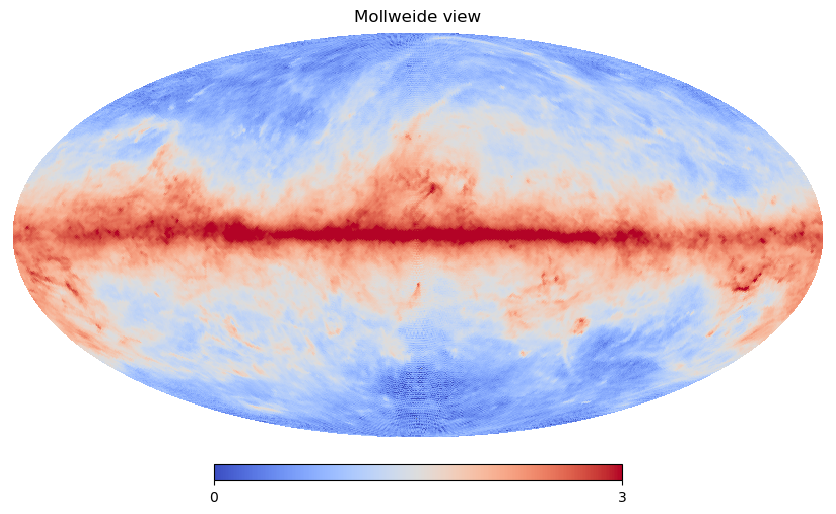

In [74]:
hp.mollview(np.log10(map), cmap = "coolwarm", min = 0, max=3, )

In [11]:
open( "convolve_and_scanT.jl", "w" ) do fp
    
write( fp, """using Condor
using NPZ
using Healpix
using DataFrames
using Falcons
using PyCall
np=pyimport("numpy")

idx=parse(Int64, ARGS[1])
nside = parse(Int64, ARGS[2])
dir_save = ARGS[3]
dir=dir_save*"test_\$idx.hdf5"
alm_path="./alm_test.npy"
blm_path="./blm_test.npy"
alm = npzread(alm_path)
blm = npzread(blm_path)
        
npix = nside2npix(nside)
res = Resolution(nside)
lmax = 3nside-1

unique_θ = unique_theta(npix, res);

FFTConv_demo_onlyT(alm, blm, unique_θ, lmax, nside, idx, dir)

GC.gc()
        
ss = gen_ScanningStrategy()
Hz=parse(Int64, ARGS[4])
dir_map=dir_save*"test=map=\$nside=\$idx=\$Hz"

day = 60 * 60 * 24
year = day * 365
        
ss.nside = nside
ss.duration = year #[sec]
ss.sampling_rate = Hz #[Hz]
ss.alpha = 45 #[degree]
ss.beta = 50 #[degree]
ss.prec_rpm = period2rpm(192.348)
ss.spin_rpm = 0.05 #[rpm]
ss.hwp_rpm = 0.0 #[rpm]
ss.start_point = "pole" #You can choose "pole" or "equator"
ss.coord="G"  # 
ss.FP_theta = [0] #[target_det.theta[1]]
ss.FP_phi = [0] #[target_det.phi[1]] .+ 30

d_var , h= get_psi_make_TOD_T(ss, division = 1600, idx = idx, map_div=4, dir=dir)

np.save(dir_map, d_var[:,1])

run(`rm \$dir`)
""" )
end

1137

In [12]:
open( "job_sample_conv_scan.sh", "w" ) do fp
    
write( fp, """
script=convolve_and_scanT.jl
count=1
dir=./test_map/
Hz=1
out=/group/cmb/litebird/usr/ynagano/Conv_2DFFT/std
for i in `seq  1 511`
do
    if [ \$(( \$count % 3 )) -eq 0 ] ; then
    sleep 1
    echo "sleep!"
    fi
    bsub -q cmb_px julia \$script \$i 128 \$dir \$Hz
    #julia \$script \$i 128 \$dir \$Hz
    count=\$((++count)) 
done
""" )
    
end

321

In [ ]:
run(`bash job_sample_conv_scan.sh`)

Job <59038322> is submitted to queue <l>.
Job <59038324> is submitted to queue <l>.
sleep!
Job <59038328> is submitted to queue <l>.
Job <59038329> is submitted to queue <l>.
Job <59038331> is submitted to queue <l>.
sleep!
Job <59038335> is submitted to queue <l>.
Job <59038337> is submitted to queue <l>.
Job <59038339> is submitted to queue <l>.
sleep!
Job <59038347> is submitted to queue <l>.
Job <59038349> is submitted to queue <l>.
Job <59038352> is submitted to queue <l>.
sleep!
Job <59038361> is submitted to queue <l>.
Job <59038364> is submitted to queue <l>.
Job <59038366> is submitted to queue <l>.
sleep!
Job <59038376> is submitted to queue <l>.
Job <59038378> is submitted to queue <l>.
Job <59038381> is submitted to queue <l>.
sleep!
Job <59038390> is submitted to queue <l>.
Job <59038393> is submitted to queue <l>.
Job <59038396> is submitted to queue <l>.
sleep!
Job <59038405> is submitted to queue <l>.
Job <59038406> is submitted to queue <l>.
Job <59038409> is submitted

Job <59039601> is submitted to queue <l>.
Job <59039603> is submitted to queue <l>.
sleep!
Job <59039613> is submitted to queue <l>.
Job <59039616> is submitted to queue <l>.
Job <59039618> is submitted to queue <l>.
sleep!
Job <59039627> is submitted to queue <l>.
Job <59039629> is submitted to queue <l>.
Job <59039632> is submitted to queue <l>.
sleep!
Job <59039641> is submitted to queue <l>.
Job <59039643> is submitted to queue <l>.
Job <59039645> is submitted to queue <l>.
sleep!
Job <59039655> is submitted to queue <l>.
Job <59039657> is submitted to queue <l>.
Job <59039659> is submitted to queue <l>.
sleep!
Job <59039668> is submitted to queue <l>.
Job <59039671> is submitted to queue <l>.
Job <59039673> is submitted to queue <l>.
sleep!
Job <59039682> is submitted to queue <l>.
Job <59039684> is submitted to queue <l>.
Job <59039687> is submitted to queue <l>.
sleep!
Job <59039696> is submitted to queue <l>.
Job <59039697> is submitted to queue <l>.
Job <59039700> is submitted